<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
from collections import namedtuple   # Convenient to store the data rows
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

%matplotlib inline



CP = pd.read_csv('./data/chipotle.tsv',sep = '\t')


In [2]:
CP.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [3]:
CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [4]:
CP.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [5]:
#CP['choice_description'].value_counts()
#CP.item_name.value_counts().plot(kind='barh');

In [6]:
CP['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [7]:
CP['item_price']=CP.item_price.str.replace('$', '').map(lambda x: float(x))
print('item_price')

item_price


In [8]:
CP.item_price.mean()

7.464335785374397

In [9]:
Total_Order_Price = CP.groupby('order_id').item_price.sum()
print(Total_Order_Price)

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
6       17.50
7       15.70
8       10.88
9       10.67
10      13.20
11      12.38
12      14.37
13      10.88
14      10.08
15      10.88
16      10.68
17      10.08
18      24.90
19      13.90
20      36.20
21      23.36
22      12.98
23      11.17
24      12.07
25      11.38
26      20.50
27      13.90
28      33.70
29      17.98
30      23.36
        ...  
1805    20.00
1806    13.00
1807    18.64
1808    13.70
1809    14.45
1810    23.00
1811    29.25
1812    22.50
1813    17.50
1814    13.70
1815    12.50
1816    13.20
1817    13.00
1818    18.14
1819    13.20
1820    12.50
1821    13.70
1822    23.00
1823    12.15
1824    26.95
1825    66.50
1826    15.95
1827    32.95
1828    14.45
1829    24.25
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64


In order to perform a calculation on item price I needed to change it from a string to a float.
I then grouped on order_Id as a unique data element to sunmarize the price per order as the "Total_Order_Price".
Finally I found the average price per order (and rounded the float to two decimal places)

In [10]:
round(Total_Order_Price.mean(), 2)

18.81

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

I created an object 'sodas' baed on the item name having membership in a list I created with unique soda names.
Then I create another object 'unique_sodas' and printed it for display of the choice description column for all unique soda types that were ordered from Chipotle (I suppose it's possible they sell something that was not ordered in this dataset)

In [11]:
sodas = CP[CP['item_name'].isin(['Canned Soda', 'Canned Soft Drink'])]
unique_sodas=sodas['choice_description'].unique()
print(unique_sodas)

['[Sprite]' '[Dr. Pepper]' '[Mountain Dew]' '[Diet Dr. Pepper]'
 '[Coca Cola]' '[Diet Coke]' '[Coke]' '[Lemonade]' '[Nestea]']


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [12]:
unique_burittos = CP[CP['item_name'].isin(['Chicken Burrito', 'Steak Burrito', 'Veggie Burrito', 'Barbacoa Burrito', 'Carnitas Burrito', 'Burrito'])]

Burrito_List = unique_burittos['item_name'].unique()
#unique_burittos['choice_description'].value_counts()

In [13]:
CP['choice_description']=CP['choice_description'].str.replace('[', '')
CP['choice_description']=CP['choice_description'].str.replace(']', '')
CP = pd.concat([CP,CP['choice_description'].str.get_dummies(sep=', ')],1)

In [14]:
CP.head()
#CP['total_toppings']=
#function to sum toppings columns
#function to name list for unqiue_burrittos
#find the average of # of toppings for total toppings where an item name is in the list of unique_burrittos

,order_id,quantity,item_name,choice_description,item_price,Adobo-Marinated and Grilled Chicken,Adobo-Marinated and Grilled Steak,Apple,Black Beans,Blackberry,...,Sour Cream,Sprite,Tomatillo Green Chili (Medium),Tomatillo Green Chili Salsa,Tomatillo Red Chili (Hot),Tomatillo Red Chili Salsa,Tomatillo-Green Chili Salsa (Medium),Tomatillo-Red Chili Salsa (Hot),Vegetarian Black Beans,White Rice
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Izze,Clementine,3.39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Nantucket Nectar,Apple,3.39,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [15]:
Topping_Columns=CP.columns[5:]
CP['Total_Toppings'] = CP[Topping_Columns].sum(axis=1)

I created an object with a list of all unique burrito names in the item name column, I then cleaned up the data to remove versions of item names with different brackets, etc. and created a column with binary values for if a 'topping' item was added to an order.  I then created a new column to sum the total of toppings from the dummy value columns.  Finally I found the mean of total toppings for all the item names (of burritos) with membership in the buritto list I created.

In [16]:
CP[CP['item_name'].isin(Burrito_List)]['Total_Toppings'].mean()

5.395051194539249

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [17]:
chips = CP[CP['item_name'].isin(['Chips', 'Chips and Guacamole', 'Chips and Fresh Tomato Salsa', 'Side of Chips', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Tomatillo-Red Chili Salsa', 
'Chips and Roasted Chili-Corn Salsa', 'Chips and Mild Fresh Tomato Salsa'])]
chip_list = list(chips['item_name'].unique())
print(chip_list)

['Chips and Fresh Tomato Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Side of Chips', 'Chips and Guacamole', 'Chips and Tomatillo Green Chili Salsa', 'Chips', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Chips and Mild Fresh Tomato Salsa']


item_name
Chips                                    230
Chips and Fresh Tomato Salsa             130
Chips and Guacamole                      506
Chips and Mild Fresh Tomato Salsa          1
Chips and Roasted Chili Corn Salsa        23
Chips and Roasted Chili-Corn Salsa        18
Chips and Tomatillo Green Chili Salsa     45
Chips and Tomatillo Red Chili Salsa       50
Chips and Tomatillo-Green Chili Salsa     33
Chips and Tomatillo-Red Chili Salsa       25
Side of Chips                            110
Name: quantity, dtype: int64


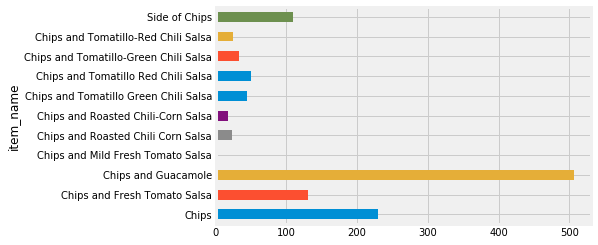

In [18]:
print(chips.groupby('item_name').quantity.sum())
chips.groupby('item_name').quantity.sum().plot(kind='barh');

In [19]:
chip_list=chips.groupby('item_name').quantity.sum().index

In [20]:
chip_quantity=chips.groupby('item_name').quantity.sum().values

In [21]:
chip_orders_dict = dict(zip(chip_list,chip_quantity))
print(chip_orders_dict)

{'Chips': 230, 'Chips and Fresh Tomato Salsa': 130, 'Chips and Guacamole': 506, 'Chips and Mild Fresh Tomato Salsa': 1, 'Chips and Roasted Chili Corn Salsa': 23, 'Chips and Roasted Chili-Corn Salsa': 18, 'Chips and Tomatillo Green Chili Salsa': 45, 'Chips and Tomatillo Red Chili Salsa': 50, 'Chips and Tomatillo-Green Chili Salsa': 33, 'Chips and Tomatillo-Red Chili Salsa': 25, 'Side of Chips': 110}


I created an object 'chips' with a list of all the item names that were unique orders for chips.  I then created a list with the unique chip item names and another list with the total order quanitity for each of these items.  Finally I created a dictionary which combined the index and values for chip item names and chip item name quanities.

In [22]:
chip_orders_dict['Chips and Guacamole']

506

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


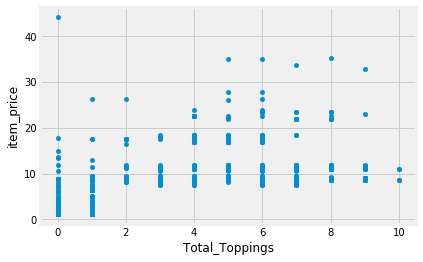

In [42]:
CP.plot(kind='scatter', x='Total_Toppings', y="item_price");
    

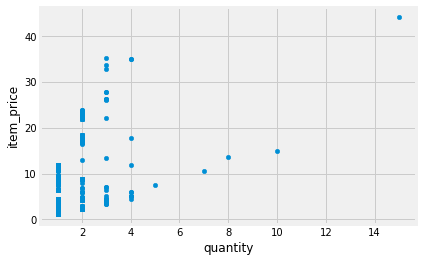

In [41]:
CP.plot(kind='scatter', x='quantity', y="item_price");